# Introduction

This project will analyze biodiversity data from the National Parks Service and answer questions including:

- **How many of each Class are in each conservation status?**
- **What percent of each Class is "declining"?**
- **Which species were most frequently observed?**
- **What is the rarest bird to spot at each park?**
- **Where are Canids most likely to be spotted?**

### Data sources

Both `observations.csv` and `species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

# Load the Data

For this project, import the necessary python modules.

In [309]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Load the datasets, `species_info` and `observations`, into the DataFrames `spe` and `obs`.

In [310]:
spe = pd.read_csv("species_info.csv")
obs = pd.read_csv("observations.csv")

# Explore the DataFrames

### Species

`spe`'s four columns give the following information:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

With `.head()`, peek at just the first five of 5824 rows.

In [311]:
print(f"species_info dataframe (rows, columns): {spe.shape}")
print(spe.head())

species_info dataframe (rows, columns): (5824, 4)
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


### Observations

The `obs` *also* has a **scientific_name** column, containing similar information.

Here are the other two columns:
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

With 23296 rows, `obs` is much longer than `spe`.

In [312]:
print(f"observations dataframe (rows, columns): {obs.shape}")
print(obs.head())

observations dataframe (rows, columns): (23296, 3)
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


# Explore the Columns

### Species

The `category` column contains seven unique Classes of living things; five animals and two plants.

`Vascular Plant` dominates the column, while `Bird` is easily the most frequent animal.

In [313]:
print(spe['category'].unique())
print(spe.groupby('category').size())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


The `conservation_status` column, displays four status levels:
- **Species of Concern** - The species may soon be threatened
- **Threatened** - The species is declining toward endangerment
- **Endangered** - The species is declining toward extinction
- **In Recovery** - The species, previously endangered, is being protected by recovery plans

The column is also littered with null or NaN values, which represent species not at risk (labeled "No Concern" later in this project).

In [314]:
print(spe['conservation_status'].unique())
print(spe.groupby('conservation_status').size())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### Observations

The `park_name` column contains four National Parks.

Each park has the same number of references, 5824, which is also how many species are in `spe`. It seems as though each park may have an observation row for each species.

In [315]:
print(obs['park_name'].unique())
print(obs.groupby('park_name').size())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64


The `observations` column contains numbers from 9 to 321, with half of the numbers located between 86 and 195.

Over the last 7 days, there were over 3.3 million total sightings across the four National Parks!

In [316]:
print("Some summary statistics of the observations column:")
print(f"Min:    {obs['observations'].min()}")
print(f"Max:    {obs['observations'].max()}")
print(f"Mean:   {obs['observations'].mean()}")
print(f"Median: {obs['observations'].median()}")
q3, q1 = np.percentile(obs['observations'], [75, 25])
print(f"IQR:    from {q1} to {q3}")
print(f"Sum:    {obs['observations'].sum()}")

Some summary statistics of the observations column:
Min:    9
Max:    321
Mean:   142.28790350274724
Median: 124.0
IQR:    from 86.0 to 195.0
Sum:    3314739


# Wrangle the Data

The aforementioned crowd of NaN values in the `observation` column would be easier to work with as actual values.

Below, the null values are replaced with 'No Concern'. 5633 of the 5824 species are not at risk.

In [317]:
spe['conservation_status'].fillna('No Concern', inplace=True)
print(spe['conservation_status'].unique())
print(spe.groupby('conservation_status').size())

['No Concern' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Endangered              16
In Recovery              4
No Concern            5633
Species of Concern     161
Threatened              10
dtype: int64


# Analyze the Data

### How many of each Class are in each conservation status?

Of the 16 endangered species, 7 were mammals, and 4 were birds. There were only 2 Classes in recovery, 3 birds and 1 mammal.

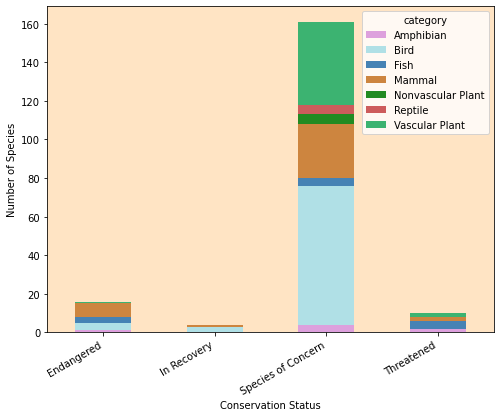

In [318]:
cons_by_cat = spe[spe.conservation_status != "No Concern"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

ax = cons_by_cat.plot(kind = 'bar', figsize=(8,6), color=['plum', 'powderblue', 'steelblue', 'peru', 'forestgreen', 'indianred', 'mediumseagreen'], stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_facecolor('bisque')
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

### What percent of each Class is "declining"?

Here, "declining" will mean species listed as 'Endangered', 'Threatened', or a 'Species of Concern'.

Each Class population in our data is different. For example, there are more than twice as many birds as mammals. To see if any one Class is more vulnerable than another, percentages have been factored into the chart below.

While there are more birds declining, there is a slightly higher percentage of mammals declining.

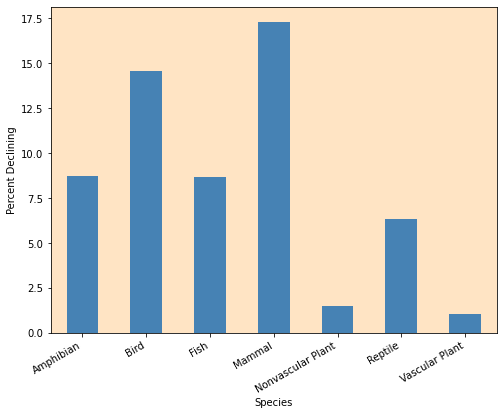

In [319]:
concern = pd.DataFrame()

concern['count'] = spe.groupby('category').size()

concern['danger_count'] = spe.loc[spe['conservation_status']\
    .isin(['Endangered', 'Threatened', 'Species of Concern'])]\
    .groupby(['category'])['scientific_name'].count()

concern['danger_perc'] = (concern['danger_count'] / concern['count']) * 100

ax = concern['danger_perc'].plot(kind = 'bar', figsize=(8,6), color='steelblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_facecolor('bisque')
ax.set_xlabel("Species")
ax.set_ylabel("Percent Declining");

### Which species were most frequently observed?

Below, information from `spe` is merged with `obs` and sorted by the number of `observations`.

The top five species are all Vascular Plants from Yellowstone.

In [329]:
freq_obs = obs.merge(spe[['scientific_name','common_names', 'category']], on='scientific_name', how='left')

print(freq_obs.sort_values(by='observations', ascending=False).head())

                 scientific_name                  park_name  observations  \
12447     Lycopodium tristachyum  Yellowstone National Park           321   
1299          Castilleja miniata  Yellowstone National Park           317   
22819        Cryptantha fendleri  Yellowstone National Park           316   
9637   Dracocephalum parviflorum  Yellowstone National Park           316   
7822           Bidens tripartita  Yellowstone National Park           314   

                                            common_names        category  
12447                   Deep-Root Clubmoss, Ground Cedar  Vascular Plant  
1299   Giant Red Indian Paintbrush, Great Red Indian ...  Vascular Plant  
22819  Fendler's Cryptantha, Sanddune Catseye, Sanddu...  Vascular Plant  
9637                                 American Dragonhead  Vascular Plant  
7822                Stick-Tight, Three-Lobe Beggar-Ticks  Vascular Plant  


### What is the rarest bird to find at each park?

While there are only 11 Spotted Owls in the Great Smoky Mountains, the Whooping Crane proves difficult to find in both Yosemite and Yellowstone.

In [367]:
rare_birds = obs.merge(spe[['scientific_name','common_names', 'category']], on='scientific_name', how='left')
parks = ['Great Smoky Mountains National Park', 'Yosemite National Park',
 'Bryce National Park', 'Yellowstone National Park']

print("Rarest birds by park:")

for park in parks:
    row = rare_birds.loc[(rare_birds['category'] == 'Bird') & (rare_birds['park_name'] == park)]
    i = row['observations'].idxmin()
    print(f"{row['observations'][i]} {row['common_names'][i]}s in {park}")

Rarest birds by park:
11 Spotted Owls in Great Smoky Mountains National Park
37 Whooping Cranes in Yosemite National Park
20 Bachman's Warbler, Bachman's Wood Warblers in Bryce National Park
57 Whooping Cranes in Yellowstone National Park


### Canis Genus observations by park

Canids are dog-like carnivores. Below are all of the species of the Canis genus in the `spe` DataFrame.

Notice that all species are of conservation concern, including three endangered.

In [320]:
all_canids = spe[spe['scientific_name'].str.contains("Canis")]
print(all_canids)

     category scientific_name     common_names conservation_status
7      Mammal   Canis latrans           Coyote  Species of Concern
8      Mammal     Canis lupus        Gray Wolf          Endangered
9      Mammal     Canis rufus         Red Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered


With a new, merged DataFrame, it is easier to see which parks have the most Canis sightings.

When sorted by observations, the DataFrame shows Yellowstone as the clear front runner.

In [321]:
canis_obs = obs.merge(all_canids[['scientific_name','conservation_status']], on='scientific_name', how='right')

canis_obs = canis_obs.replace(" National Park", "", regex=True)

print(canis_obs.sort_values(by='observations', ascending=False).head())

   scientific_name    park_name  observations conservation_status
1    Canis latrans  Yellowstone           206  Species of Concern
27     Canis lupus  Yellowstone           203         In Recovery
39     Canis lupus  Yellowstone           203          Endangered
11     Canis lupus  Yellowstone           203          Endangered
29     Canis lupus     Yosemite           117         In Recovery


The chart below shows just how many more Canids were spotted in Yellowstone than in the other parks! 

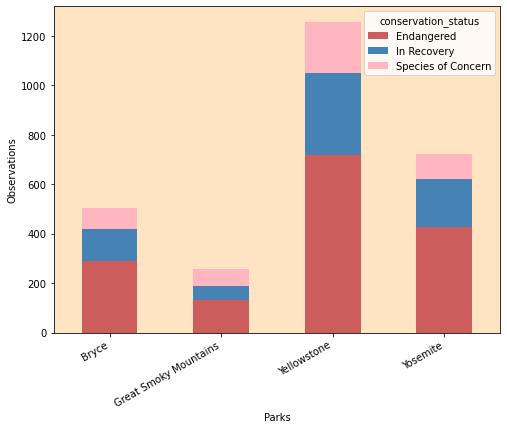

In [323]:
df = canis_obs.groupby(['park_name', 'conservation_status'])['observations'].sum().unstack()

ax = df.plot(kind = 'bar', figsize=(8,6), stacked=True, color=['indianred', 'steelblue', 'lightpink'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_facecolor('bisque')
ax.set_xlabel("Parks")
ax.set_ylabel("Observations");

# Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project answered many questions with special attention to those posed in the introduction:

- **How many of each Class are in each conservation status?**

        There were more Birds than any other Class, especially of the "Species of Concern" status.

- **What percent of each Class is "declining"?**

        Mammals and Birds had the highest percentage of declining species.
        
- **Which species were most frequently observed?**
        
        The top five species are all Vascular Plants from Yellowstone.
        
- **What is the rarest bird to spot at each park?**

        The Spotted Owl in the Great Smoky Mountains is the hardest to find.

- **Where are Canids most likely to be spotted?**

        Canids are most likely to be seen at Yellowstone National Park.

# Further Research

- The observations dataset does not give any information about the size of the parks or how many visitors were there. Of the four parks observed, Yellowstone covers the most area, but the Great Smoky Mountains attract more visitors. Factors such as these could have an affect on species sightings.

- Additionally, it only records information from a single week. It would be interesting to see how the number of observations changes, perhaps as the conservation statuses change.

- Finally, the in-depth analysis done on Canids could be replicated for any number of the other categories of animals and plants!